# Ejercicios con Pandas y Visualización de Datos - Toxicidad Acuática

En este notebook trabajaremos con un conjunto de datos relacionado con la toxicidad acuática de compuestos químicos.
Utilizaremos **pandas** para manipular los datos y **matplotlib** para representar gráficamente la información.

🔧 Asegúrate de tener los paquetes `pandas` y `matplotlib` instalados antes de ejecutar el notebook.

Importa las librerías necesarias y carga el archivo `'Dataset_EC50_Pandas.csv'`. Visualiza las primeras filas para asegurarte que el DataFrame es correcto.


In [2]:
import pandas as pd

# Cargar el archivo CSV con el delimitador correcto
df = pd.read_csv('Dataset_EC50_Pandas.csv', sep=';')

# Visualizar las primeras filas del DataFrame
df.head()

,CAS Number,Chemical Name,SMILES,Species Scientific Name,Species Common Name,Species Sub Phylum,Effect,Organism Lifestage,Exposure Duration Mean (Days),Conc 1 Mean (Standardized),Conc 1 Mean Op (Standardized),Conc 1 Units (Standardized)
0,50-29-3,"1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...",Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1,Osteichthyes,Bony Fishes,Vertebrata,Mortality,Juvenile,NR,0.028,NaN,AI mg/L
1,50-29-3,"1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...",Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1,Mugil cephalus,Striped Mullet,Vertebrata,Mortality,Not reported,NR,0.0004,NaN,AI mg/L
2,50-29-3,"1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...",Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1,Mugil cephalus,Striped Mullet,Vertebrata,Mortality,Not reported,NR,0.0008,NaN,AI mg/L
3,50-29-3,"1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...",Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1,Mugil cephalus,Striped Mullet,Vertebrata,Mortality,Not reported,NR,0.0055,NaN,AI mg/L
4,50-29-3,"1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...",Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1,Mugil cephalus,Striped Mullet,Vertebrata,Mortality,Not reported,NR,0.0004,NaN,AI mg/L


# Ejercicios con Pandas y Visualización de Datos - Toxicidad Acuática

### Ejercicio 1: Exploración básica
Muestra cuántas filas y columnas tiene el DataFrame, y qué nombres tienen las columnas.

In [3]:
# Mostrar el número de filas y columnas
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Mostrar los nombres de las columnas
print("Los nombres de las columnas son:")
print(df.columns.tolist())

El DataFrame tiene 4227 filas y 12 columnas.
Los nombres de las columnas son:
['CAS Number', 'Chemical Name', 'SMILES', 'Species Scientific Name', 'Species Common Name', 'Species Sub Phylum', 'Effect', 'Organism Lifestage', 'Exposure Duration Mean (Days)', 'Conc 1 Mean (Standardized)', 'Conc 1 Mean Op (Standardized)', 'Conc 1 Units (Standardized)']


### Ejercicio 2: Detección de valores nulos
Cuenta cuántos valores faltantes hay en la columna "Conc 1 Mean (Standardized)".

In [4]:
# Contar valores nulos en la columna "Conc 1 Mean (Standardized)"
valores_nulos = df['Conc 1 Mean (Standardized)'].isnull().sum()
print(f"Hay {valores_nulos} valores faltantes en la columna 'Conc 1 Mean (Standardized)'.")

Hay 0 valores faltantes en la columna 'Conc 1 Mean (Standardized)'.


### Ejercicio 3: Valores únicos
Muestra todos los efectos diferentes registrados en la base de datos.

In [5]:
# Mostrar todos los efectos diferentes registrados en la base de datos
efectos_unicos = df['Effect'].unique()
print("Efectos diferentes registrados en la base de datos:")
print(efectos_unicos)

Efectos diferentes registrados en la base de datos:
['Mortality']


### Ejercicio 4: Especies más frecuentes
Muestra las 5 especies científicas más comunes en el dataset.

In [6]:
# Mostrar las 5 especies científicas más comunes
especies_comunes = df['Species Scientific Name'].value_counts().head(5)
print("Las 5 especies científicas más comunes son:")
print(especies_comunes)

Las 5 especies científicas más comunes son:
Species Scientific Name
Pimephales promelas    658
Lepomis macrochirus    568
Oncorhynchus mykiss    493
Danio rerio            426
Ictalurus punctatus    184
Name: count, dtype: int64


### Ejercicio 5: Estadísticas descriptivas
Convierte la columna de concentración a formato numérico y muestra estadísticas básicas.

In [7]:
# Convertir la columna "Conc 1 Mean (Standardized)" a formato numérico
df['Conc 1 Mean (Standardized)'] = pd.to_numeric(df['Conc 1 Mean (Standardized)'], errors='coerce')

# Mostrar estadísticas descriptivas básicas
estadisticas = df['Conc 1 Mean (Standardized)'].describe()
print("Estadísticas descriptivas de la columna 'Conc 1 Mean (Standardized)':")
print(estadisticas)

Estadísticas descriptivas de la columna 'Conc 1 Mean (Standardized)':
count    4.118000e+03
mean     1.778908e+02
std      1.792027e+03
min      2.000000e-07
25%      8.489183e-02
50%      6.800000e-01
75%      1.023000e+01
max      6.200000e+04
Name: Conc 1 Mean (Standardized), dtype: float64


### Ejercicio 6: Filtrado de datos
Filtra las filas donde el efecto es "Mortality" y la concentración es superior a 1.

In [8]:
# Filtrar las filas donde el efecto es "Mortality" y la concentración es superior a 1
filtro_mortalidad = df[(df['Effect'] == 'Mortality') & (df['Conc 1 Mean (Standardized)'] > 1)]

# Mostrar las primeras filas del resultado filtrado
print(filtro_mortalidad.head())

   CAS Number                                      Chemical Name  \
13    50-29-3  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
22    50-29-3  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
27    50-29-3  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
49    50-29-3  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
51    50-29-3  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   

                                    SMILES Species Scientific Name  \
13  Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1        Gambusia affinis   
22  Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1        Gambusia affinis   
27  Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1    Rasbora heteromorpha   
49  Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1    Rasbora heteromorpha   
51  Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1    Rasbora heteromorpha   

           Species Common Name Species Sub Phylum     Effect  \
13        Western Mosquitofish         Vertebrata  Mortality   
22        Western Mosquitofish         Ver

### Ejercicio 7: Agrupación por especie
Calcula la concentración media por especie (nombre común) y ordénalas de mayor a menor.

In [9]:
# Calcular la concentración media por especie (nombre común) y ordenarlas de mayor a menor
concentracion_media_especie = df.groupby('Species Common Name')['Conc 1 Mean (Standardized)'].mean().sort_values(ascending=False)

# Mostrar las primeras filas del resultado
print("Concentración media por especie (nombre común), ordenadas de mayor a menor:")
print(concentracion_media_especie.head())

Concentración media por especie (nombre común), ordenadas de mayor a menor:
Species Common Name
Bleak             5000.040000
Indian Catfish    2170.432444
Mummichog         1338.880803
Sunbleak           946.707143
Common Carp        836.277254
Name: Conc 1 Mean (Standardized), dtype: float64


### Ejercicio 8: Gráfico de barras
Representa en un gráfico las 10 especies con mayor concentración media.

In [9]:
!pip install --upgrade nbformat


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import matplotlib.pyplot as plt
import plotly.express as px

# Seleccionar las 10 especies con mayor concentración media
top_10_especies = concentracion_media_especie.head(10)


# Crear el gráfico de barras interactivo con Plotly
fig = px.bar(top_10_especies, 
             x=top_10_especies.index, 
             y=top_10_especies.values, 
             labels={'x': 'Especies', 'y': 'Concentración Media (Standardized)'},
             title='Top 10 Especies con Mayor Concentración Media')

# Personalizar el diseño
fig.update_layout(xaxis_title='Especies',
                  yaxis_title='Concentración Media (Standardized)',
                  title_font_size=14,
                  xaxis_tickangle=45)

# Mostrar el gráfico interactivo
fig.show()


### Ejercicio 9: Gráfico de dispersión
Representa un gráfico tipo boxplot para ver cómo varía la concentración según el subfilo.

<Figure size 1000x600 with 0 Axes>

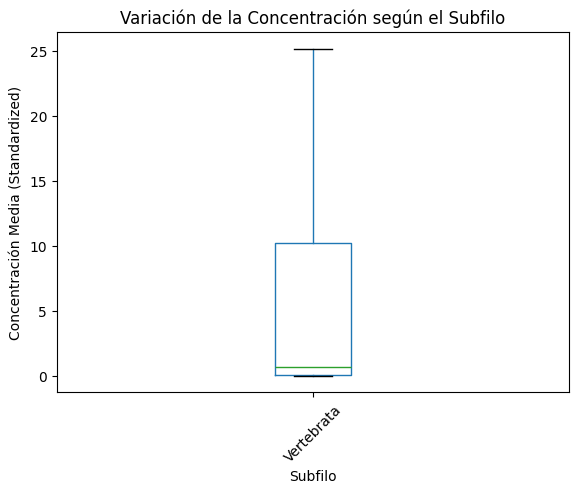

In [12]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Conc 1 Mean (Standardized)', by='Species Sub Phylum', grid=False, showfliers=False)
plt.title('Variación de la Concentración según el Subfilo')
plt.suptitle('')  # Eliminar el título automático del boxplot
plt.xlabel('Subfilo')
plt.ylabel('Concentración Media (Standardized)')
plt.xticks(rotation=45)
plt.show()


### Ejercicio 10: Exportación de subconjunto
Exporta a un nuevo CSV los registros con concentración mayor que 1.

In [13]:
# Filtrar los registros con concentración mayor que 1
registros_filtrados = df[df['Conc 1 Mean (Standardized)'] > 1]

# Exportar a un nuevo archivo CSV
registros_filtrados.to_csv('registros_con_concentracion_mayor_a_1.csv', index=False)

print("Archivo exportado correctamente.")

Archivo exportado correctamente.


### Ejercicio 11: Comprobar distribución
Representa un histograma del valor de concentración para analizar si sigue una distribución normal.

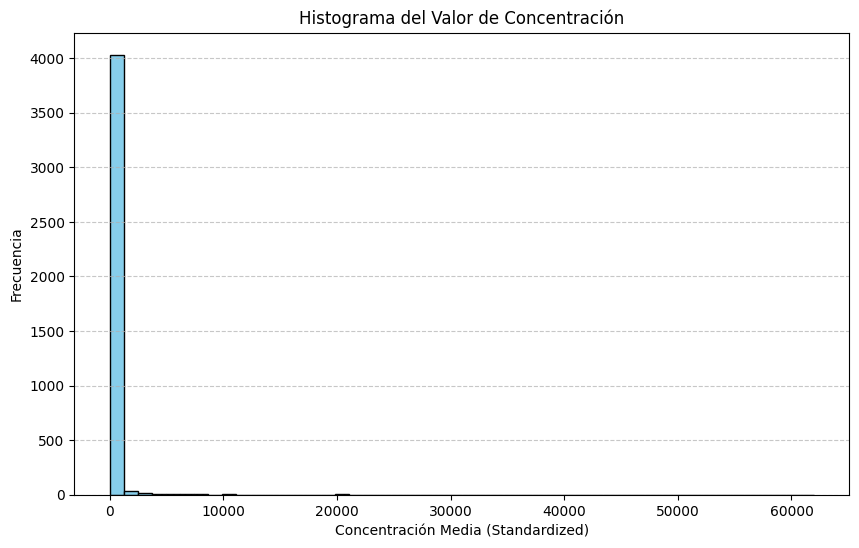

In [14]:
# Escribe aquí tu solución
# Representar un histograma del valor de concentración
plt.figure(figsize=(10, 6))
plt.hist(df['Conc 1 Mean (Standardized)'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma del Valor de Concentración')
plt.xlabel('Concentración Media (Standardized)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Ejercicio 12: Transformación logarítmica
Crea una nueva columna con el logaritmo de la concentración (añade 1 para evitar log(0)) y grafícalo de nuevo.

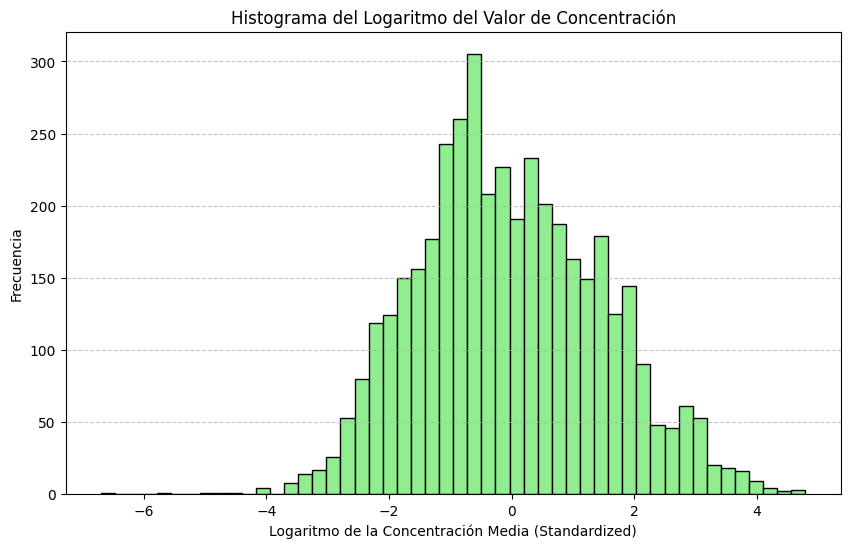

In [22]:
import numpy as np
# Escribe aquí tu solución
# Crear una nueva columna con el logaritmo de la concentración (añadiendo 1)
df['Log Conc 1 Mean (Standardized)'] = np.log10(df['Conc 1 Mean (Standardized)'])

# Representar un histograma del logaritmo de la concentración
plt.figure(figsize=(10, 6))
plt.hist(df['Log Conc 1 Mean (Standardized)'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Histograma del Logaritmo del Valor de Concentración')
plt.xlabel('Logaritmo de la Concentración Media (Standardized)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Ejercicio 13: Clasificación de toxicidad
Crea una columna nueva que diga si un compuesto es "Tóxico" (> 1) o "No tóxico" (<= 1).

In [23]:
# Crear una nueva columna que clasifique los compuestos como "Tóxico" o "No tóxico"
df['Toxicidad'] = df['Conc 1 Mean (Standardized)'].apply(lambda x: 'Tóxico' if x > 1 else 'No tóxico')

# Mostrar las primeras filas para verificar
df[['Conc 1 Mean (Standardized)', 'Toxicidad']].head()

,Conc 1 Mean (Standardized),Toxicidad
0,0.0280,No tóxico
1,0.0004,No tóxico
2,0.0008,No tóxico
3,0.0055,No tóxico
4,0.0004,No tóxico
